# Predicting heart disease using Machine learning

This notebook has the code to create a model that predicts heart disease

Data was imported from 
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
!conda install -c anaconda seaborn -y




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rosha\desktop\sample_project_1\project_heart_disease\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       he774522_0         5.8 MB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         6.0 MB

The following packages will be UPDATED:

  openssl                                 1.1.1g-he774522_1 --> 1.1.1h-he774522_0
  seaborn                                       0.10.1-py_0 --> 0.11.0-py_0




seaborn-0.11.0       | 216 KB    |            |   0% 
seaborn-0.11.0       | 216 KB    | 7          |   7% 
seaborn-0.11.0       | 216 KB    | ########## | 100% 
seaborn-0.11.0  

In [2]:
#import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

 #scikit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import plot_roc_curve



# load data


In [3]:
df = pd.read_csv("heart-disease-CLV.csv")

In [4]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#data analysis
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

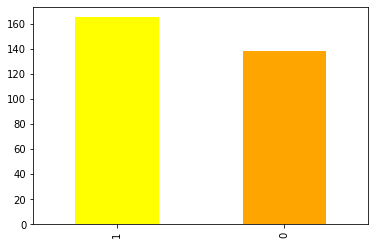

In [6]:
df["target"].value_counts().plot(kind = "bar", color=["yellow","orange"])

In [7]:
#finding null values
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart disease Frequency based on sex

In [9]:
df.sex.count()

303

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#Comparing target column with sex column
pd.crosstab(df.target, df.sex)


sex,0,1
target,,
0,24,114
1,72,93


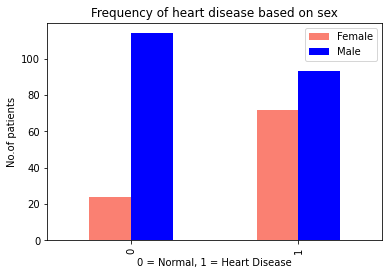

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar",color=["salmon","blue"]);
plt.title("Frequency of heart disease based on sex")
plt.xlabel("0 = Normal, 1 = Heart Disease")
plt.ylabel("No.of patients")
plt.legend(["Female","Male"])

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

# Age vs Max Heart rate

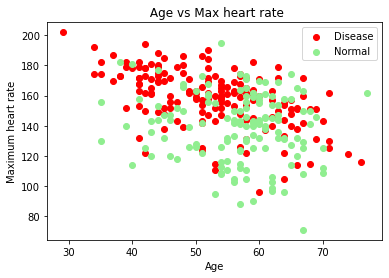

In [14]:
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color = "Red");
#sactter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color = "lightGreen");
 #Adding labels 
plt.title(" Age vs Max heart rate")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.legend(["Disease","Normal"]);

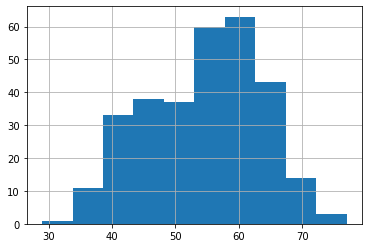

In [15]:
#find the distribution of age 

df["age"].hist();

In [16]:
#Heart Disease frequency per chest pain type
pd.crosstab(df.cp, df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


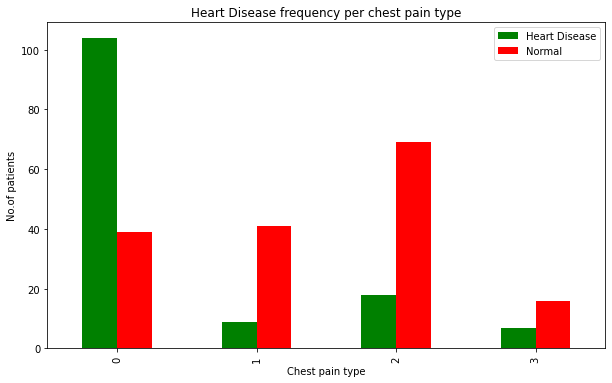

In [17]:
pd.crosstab(df.cp, df["target"]).plot(kind="bar",
                                      figsize=(10,6),
                                      color=["Green","Red"])
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("No.of patients")
plt.legend(["Heart Disease", "Normal"]);

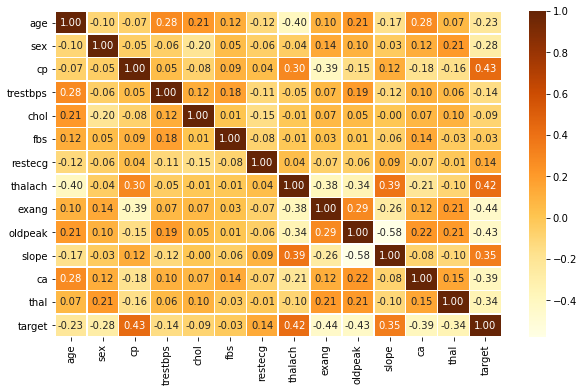

In [18]:
#correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (10,6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlOrBr");


# Modelling

In [19]:
#split data into x and y
X = df.drop("target", axis=1)
y = df["target"]


In [20]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#split data
x = df.drop("target", axis = 1)
y = df["target"]
np.random.seed(42);
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
#Model selection

models = {"Logistic Regression": LogisticRegression(),
          "Random forest classifier" : RandomForestClassifier(),
          " K neighbors classifier" : KNeighborsClassifier()}

In [24]:
def  fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores
        
    

In [25]:
model_results = fit_and_score(models,
                              X_train,
                              X_test,
                              y_train, 
                              y_test )
model_results

C:\Users\rosha\Desktop\sample_project_1\project_heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random forest classifier': 0.8360655737704918,
 ' K neighbors classifier': 0.6885245901639344}

In [26]:
model_compare = pd.DataFrame(model_results, index=["accuracy"])

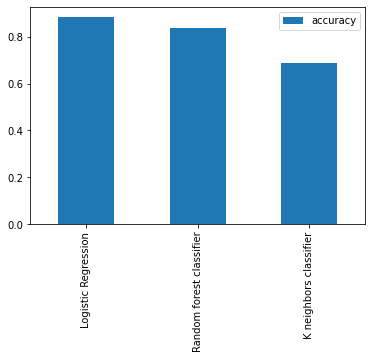

In [27]:
model_compare.T.plot.bar();

In [28]:
#After choosing model
#tuning KNN
train_scores = []
test_scores = []
neighbors = range(1,21) 
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score:75.41%


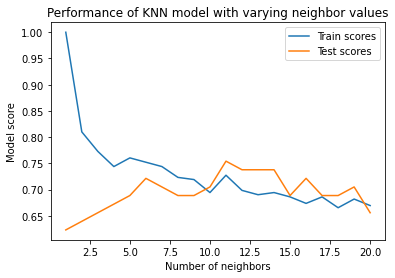

In [31]:
plt.plot(neighbors, train_scores, label="Train scores");
plt.plot(neighbors, test_scores, label="Test scores");
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.title("Performance of KNN model with varying neighbor values")
plt.legend()
maximum_knn = print(f'Maximum score:{max(test_scores)*100:.2f}%');

# TUNING HYPERPARAMETER USING RANDOMISEDSEARCHCV


In [32]:
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver": ["liblinear"]}

In [33]:
np.arange(10,1000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [34]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

In [35]:
#Tune logistic reg
np.random.seed(42)
log_reg_res = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions = log_reg_grid,
                                 cv = 5,
                                 n_iter = 20,
                                 verbose = True)
log_reg_res.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
log_reg_res.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
log_reg_res.score(X_test, y_test)

0.8852459016393442

In [38]:
rf_res = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)
rf_res.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rf_res.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [40]:
rf_res.score(X_test, y_test)

0.8688524590163934

In [69]:
#Logistic Regression model provides the best model so far
#Lets try GridSearchCV
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":["liblinear"]}
log_reg_gs = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)
log_reg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
log_reg_gs.score(X_test, y_test)

0.8852459016393442

In [44]:
# Score remains the same

#So lets make predictions

In [45]:
y_preds = log_reg_gs.predict(X_test)

In [46]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

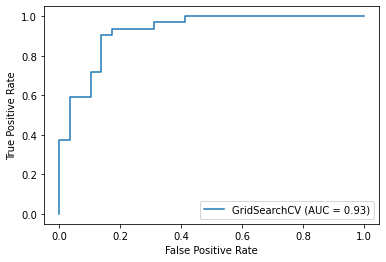

In [47]:
#ROC Curve and AUC metric
#plot roc curve
plot_roc_curve(log_reg_gs, X_test,y_test);


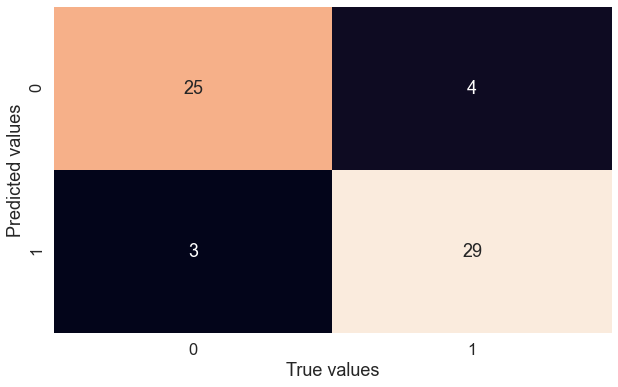

In [64]:
#Confusion matrix
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
plot_conf_mat(y_test, y_preds);

In [65]:
#Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [66]:
#Cross validation score
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [67]:
clf = LogisticRegression(C= 0.20433597178569418,
                         solver="liblinear")

In [68]:
cvs_ac = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring ="accuracy")
cvs_ac

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [53]:
cvs_ac = np.mean(cvs_ac)
cvs_ac

0.8446994535519124

In [54]:
cvs_pr = cross_val_score(clf,
                         X,
                         y, 
                         cv=5,
                         scoring="precision")
cvs_pr

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [55]:
cvs_pr = np.mean(cvs_pr)
cvs_pr

0.8207936507936507

In [56]:
cvs_rec = cross_val_score(clf,
                         X,
                         y, 
                         cv=5,
                         scoring="recall")
cvs_rec = np.mean(cvs_rec)
cvs_rec

0.9212121212121213

In [63]:
cvs_f1 = cross_val_score(clf,
                         X,
                         y, 
                         cv=5,
                         scoring="f1")
cvs_f1 = np.mean(cvs_f1)
cvs_f1

0.8673007976269721

Text(0, 0.5, 'Performance')

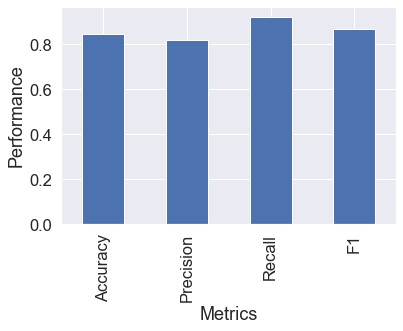

In [62]:
#Visualize cross validated metrics
cv_met = pd.DataFrame({"Accuracy":cvs_ac,
                       "Precision":cvs_pr,
                       "Recall": cvs_rec,
                       "F1": cvs_f1},
                        index=[0])
cv_met.T.plot(kind="bar", legend = False)
plt.xlabel("Metrics")
plt.ylabel("Performance")

# FEATURE IMPORTANCE


In [59]:
log_reg_gs.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')
clf.fit(X_train, y_train)
feat_dict = dict(zip(df.columns, list(clf.coef_[0])))

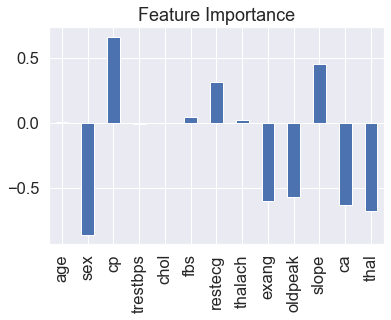

In [61]:
#plot the feature dictionary
df_feat = pd.DataFrame(feat_dict, index = [0])
df_feat.T.plot.bar(title = "Feature Importance", legend=False);